### importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\lisya/nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\lisya/nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\lisya/nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\lisya/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\lisya/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package avera

True

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Load Dataset

In [2]:
df=pd.read_csv("train.csv")
df


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


### Exploratory Data Analysis (EDA)

In [7]:
print(df.head(10))

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0          

In [9]:
# exploring the stats
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#dataset information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               159571 non-null  object
 1   comment_text     159571 non-null  object
 2   toxic            159571 non-null  int64 
 3   severe_toxic     159571 non-null  int64 
 4   obscene          159571 non-null  int64 
 5   threat           159571 non-null  int64 
 6   insult           159571 non-null  int64 
 7   identity_hate    159571 non-null  int64 
 8   clean_text       159571 non-null  object
 9   tokenized_text   159571 non-null  object
 10  no_stopwords     159571 non-null  object
 11  lemmatized_text  159571 non-null  object
 12  cleaned_text     159571 non-null  object
dtypes: int64(6), object(7)
memory usage: 15.8+ MB


(159571, 13)

In [ ]:
#finding missing values
print(df.isnull().sum())

In [17]:
#dropping the ID(no need for building a model)
df=df.drop(columns=['id'])
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [19]:
x = df.iloc[:, 1:].sum() 
x

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [21]:
b = df.iloc[:, 2:].sum(axis=1) 
b
no_label_count = 0

for i, count in b.items():
    if count==0:
        no_label_count += 1


print('Total number of comments:', len(df))
print('Total number of comments without labels:', no_label_count)
print('Total labels:', x.sum())

Total number of comments: 159571
Total number of comments without labels: 149012
Total labels: 35098


### Label Distribution Visualization

C:\Users\lisya\AppData\Local\Temp\ipykernel_13408\3682988014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:red', 'tab:grey'])


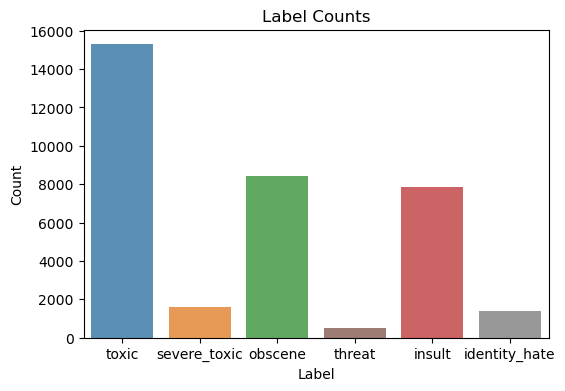

In [23]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:red', 'tab:grey'])
plt.title('Label Counts')
plt.ylabel('Count')
plt.xlabel('Label')

plt.show()

In [25]:
df.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [27]:
print(df.columns)  
print(x) 


Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


### data(text) preprocessing


In [5]:
#importing the required libraries for txt preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lisya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\lisya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#cleaning text(lowercase and removing special char and contradictions)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

df['clean_text'] = df['comment_text'].apply(clean_text)
df['clean_text']


0         explanation why the edits made under my userna...
1         d aww he matches this background colour i am s...
2         hey man i am really not trying to edit war it ...
3         more i can not make any real suggestions on im...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: clean_text, Length: 159571, dtype: object

In [11]:
#tokenize
def tokenize_text(text):
    return word_tokenize(text)
#data frmae
df['tokenized_text'] = df['clean_text'].apply(tokenize_text)
df['tokenized_text']


0         [explanation, why, the, edits, made, under, my...
1         [d, aww, he, matches, this, background, colour...
2         [hey, man, i, am, really, not, trying, to, edi...
3         [more, i, can, not, make, any, real, suggestio...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, theres, no, actual, article, fo...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, do, not, think, you, understa...
Name: tokenized_text, Length: 159571, dtype: object

In [13]:
#removing stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['no_stopwords'] = df['tokenized_text'].apply(remove_stopwords)
df['no_stopwords']


0         [explanation, edits, made, username, hardcore,...
1         [aww, matches, background, colour, seemingly, ...
2         [hey, man, really, trying, edit, war, guy, con...
3         [make, real, suggestions, improvement, wondere...
4                       [sir, hero, chance, remember, page]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, think, understand, came, idea, bad, r...
Name: no_stopwords, Length: 159571, dtype: object

In [15]:
#Lemmantize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]  
df['lemmatized_text'] = df['no_stopwords'].apply(lemmatization)
df['lemmatized_text']



0         [explanation, edits, made, username, hardcore,...
1         [aww, match, background, colour, seemingly, st...
2         [hey, man, really, trying, edit, war, guy, con...
3         [make, real, suggestion, improvement, wondered...
4                       [sir, hero, chance, remember, page]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, there, actual, article, prostit...
159569    [look, like, actually, put, speedy, first, ver...
159570    [really, think, understand, came, idea, bad, r...
Name: lemmatized_text, Length: 159571, dtype: object

In [23]:
df['cleaned_text'] = df['lemmatized_text'].apply(lambda x: " ".join(x))
df['cleaned_text']


0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567    ashamed horrible thing put talk page 128 61 19 93
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: cleaned_text, Length: 159571, dtype: object

In [31]:
print(df["cleaned_text"].head(10)) 


0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
5               congratulation well use tool well talk
6                          cocksucker piss around work
7    vandalism matt shirvington article reverted pl...
8    sorry word nonsense offensive anyway intending...
9                 alignment subject contrary dulithgow
Name: cleaned_text, dtype: object


In [33]:
#checking if the toxic words the present
df[df["cleaned_text"].str.contains("fuck|shit|bitch|ass|cunt|idiot|stupid", case=False, na=False)].head(10)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text,tokenized_text,no_stopwords,lemmatized_text,cleaned_text
15,00078f8ce7eb276d,"""\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...",0,0,0,0,0,0,juelz santanas age in 2002 juelz santana was 1...,"[juelz, santanas, age, in, 2002, juelz, santan...","[juelz, santanas, age, 2002, juelz, santana, 1...","[juelz, santanas, age, 2002, juelz, santana, 1...",juelz santanas age 2002 juelz santana 18 year ...
22,000c0dfd995809fa,"""\n\n Snowflakes are NOT always symmetrical! \...",0,0,0,0,0,0,snowflakes are not always symmetrical under ge...,"[snowflakes, are, not, always, symmetrical, un...","[snowflakes, always, symmetrical, geometry, st...","[snowflake, always, symmetrical, geometry, sta...",snowflake always symmetrical geometry stated s...
27,000ffab30195c5e1,"Yes, because the mother of the child in the ca...",0,0,0,0,0,0,yes because the mother of the child in the cas...,"[yes, because, the, mother, of, the, child, in...","[yes, mother, child, case, michael, jackson, s...","[yes, mother, child, case, michael, jackson, s...",yes mother child case michael jackson studied ...
33,001363e1dbe91225,I was able to post the above list so quickly b...,0,0,0,0,0,0,i was able to post the above list so quickly b...,"[i, was, able, to, post, the, above, list, so,...","[able, post, list, quickly, already, text, fil...","[able, post, list, quickly, already, text, fil...",able post list quickly already text file hard ...
39,0016e01b742b8da3,Notability of Rurika Kasuga\nA tag has been pl...,0,0,0,0,0,0,notability of rurika kasuga a tag has been pla...,"[notability, of, rurika, kasuga, a, tag, has, ...","[notability, rurika, kasuga, tag, placed, ruri...","[notability, rurika, kasuga, tag, placed, ruri...",notability rurika kasuga tag placed rurika kas...
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,you are gay or antisemmitian archangel white t...,"[you, are, gay, or, antisemmitian, archangel, ...","[gay, antisemmitian, archangel, white, tiger, ...","[gay, antisemmitian, archangel, white, tiger, ...",gay antisemmitian archangel white tiger meow g...
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,fuck your filthy mother in the ass dry,"[fuck, your, filthy, mother, in, the, ass, dry]","[fuck, filthy, mother, ass, dry]","[fuck, filthy, mother, as, dry]",fuck filthy mother as dry
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0,i am sorry i am sorry i screwed around with so...,"[i, am, sorry, i, am, sorry, i, screwed, aroun...","[sorry, sorry, screwed, around, someones, talk...","[sorry, sorry, screwed, around, someone, talk,...",sorry sorry screwed around someone talk page b...
48,001cadfd324f8087,"""\nAs for your claims of """"stalking"""", that is...",0,0,0,0,0,0,as for your claims of stalking that is absolut...,"[as, for, your, claims, of, stalking, that, is...","[claims, stalking, absolute, rubbish, serves, ...","[claim, stalking, absolute, rubbish, serf, agg...",claim stalking absolute rubbish serf aggravate...
50,001d8e7be417776a,"""\n\nBI, you said you wanted to talk\n\nAt the...",0,0,0,0,0,0,bi you said you wanted to talk at the bottom o...,"[bi, you, said, you, wanted, to, talk, at, the...","[bi, said, wanted, talk, bottom, lead, section...","[bi, said, wanted, talk, bottom, lead, section...",bi said wanted talk bottom lead section writte...


### Correlation Heatmap of Toxicity Categories

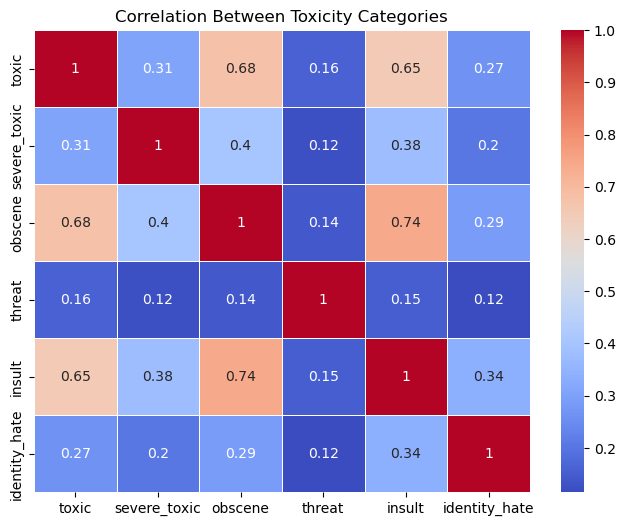

In [55]:
import seaborn as sns
#heat map for correalation
correlation_matrix = df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Toxicity Categories")
plt.show()


### Distribution of Toxic vs. Non-Toxic Comments

C:\Users\lisya\AppData\Local\Temp\ipykernel_8576\2284787021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toxic_counts.index, y=toxic_counts.values, palette=["green", "red"])


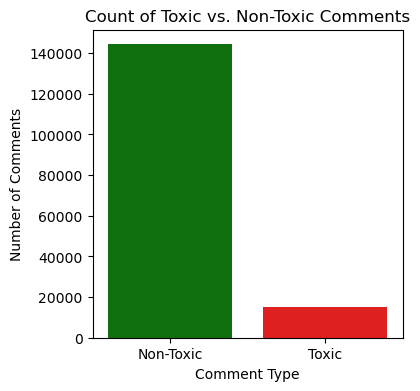

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the number of toxic and non-toxic comments
toxic_counts = df["toxic"].value_counts()
plt.figure(figsize=(4,4))
sns.barplot(x=toxic_counts.index, y=toxic_counts.values, palette=["green", "red"])
plt.xticks([0, 1], ["Non-Toxic", "Toxic"])
plt.xlabel("Comment Type")
plt.ylabel("Number of Comments")
plt.title("Count of Toxic vs. Non-Toxic Comments")
plt.show()


In [35]:
print(df.columns)  
print(df[["cleaned_text"]].head())  


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean_text', 'tokenized_text',
       'no_stopwords', 'lemmatized_text', 'cleaned_text'],
      dtype='object')
                                        cleaned_text
0  explanation edits made username hardcore metal...
1  aww match background colour seemingly stuck th...
2  hey man really trying edit war guy constantly ...
3  make real suggestion improvement wondered sect...
4                      sir hero chance remember page


In [37]:
import re
# Remove numbers, special characters, and extra spaces
df["cleaned_text"] = df["cleaned_text"].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
df["cleaned_text"] = df["cleaned_text"].str.lower() 
df["cleaned_text"] = df["cleaned_text"].str.replace(r'\s+', ' ', regex=True) 

In [39]:
df["cleaned_text"]

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                ashamed horrible thing put talk page 
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: cleaned_text, Length: 159571, dtype: object

### TF-IDF Feature Extraction

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vector = TfidfVectorizer(max_features=2000,  stop_words=None,  ngram_range=(1,2), sublinear_tf=True)
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2000, token_pattern=r'[A-Za-z]{2,}')
tfidf_matrix = tfidf_vector.fit_transform(df["cleaned_text"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vector.get_feature_names_out())
print("Shape of TF-IDF features:", tfidf_df.shape)
print(tfidf_df.head(20))  

Shape of TF-IDF features: (159571, 2000)
    ability  able  absolutely  abuse  academic  accept  acceptable  accepted  \
0       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
1       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
2       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
3       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
4       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
5       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
6       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
7       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
8       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
9       0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   
10      0.0   0.0         0.0    0.0       0.0     0.0         0.0       0.0   

In [46]:
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
tfidf_matrix


TF-IDF Matrix Shape: (159571, 2000)


<159571x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3185152 stored elements in Compressed Sparse Row format>

### Defining Features and Target Variables

In [48]:
X = tfidf_matrix  # TF-IDF transformed data
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]  



In [50]:
X


<159571x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3185152 stored elements in Compressed Sparse Row format>

### dataset splitting

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split




In [54]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
140030,1,0,0,0,0,0
159124,0,0,0,0,0,0
60006,0,0,0,0,0,0
65432,0,0,0,0,0,0
154979,0,0,0,0,0,0
...,...,...,...,...,...,...
119879,0,0,0,0,0,0
103694,0,0,0,0,0,0
131932,1,0,0,0,0,0
146867,0,0,0,0,0,0


In [45]:
y_test

,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,0,0,0,0,0,0
131631,0,0,0,0,0,0
125326,0,0,0,0,0,0
111256,0,0,0,0,0,0
83590,0,0,0,0,0,0
...,...,...,...,...,...,...
121162,0,0,0,0,0,0
34019,0,0,0,0,0,0
83938,0,0,0,0,0,0
78687,1,0,1,0,1,0


### Verifying training and testing set shapes


In [47]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (127656, 2000) (127656, 6)
Testing set shape: (31915, 2000) (31915, 6)


### Building the Model with Logistic Regression


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

log_reg = LogisticRegression(C=0.5, penalty='l1', solver='liblinear', max_iter=200)

multi_label_model = MultiOutputClassifier(log_reg)
multi_label_model.fit(X_train, y_train)
y_pred = multi_label_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print("Classification Report of ]logistic regression:\n")
print(classification_report(y_test, y_pred, target_names=y.columns))



Classification Report of ]logistic regression:

               precision    recall  f1-score   support

        toxic       0.89      0.62      0.73      3056
 severe_toxic       0.55      0.26      0.36       321
      obscene       0.90      0.68      0.77      1715
       threat       0.56      0.14      0.22        74
       insult       0.82      0.55      0.66      1614
identity_hate       0.69      0.22      0.34       294

    micro avg       0.86      0.58      0.69      7074
    macro avg       0.73      0.41      0.51      7074
 weighted avg       0.85      0.58      0.69      7074
  samples avg       0.06      0.05      0.05      7074



C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Hyperparameter Tuning for Logistic Regression
- Using `GridSearchCV` to find the best parameters for Logistic Regression.
- Wrapped in `MultiOutputClassifier` for multi-label classification.
- Evaluating the model after tuning.


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Define parameter grid
param_grid = {'estimator__C': [0.01, 0.1, 1, 10],'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['liblinear', 'saga'] }
base_model = LogisticRegression()
# note:Wrap it in MultiOutputClassifier (since it's multi-label classification)
multi_label_model = MultiOutputClassifier(base_model)
grid_search = GridSearchCV(multi_label_model, param_grid, cv=3, scoring='f1_micro', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters are:", grid_search.best_params_)
logreg_tuned = grid_search.best_estimator_
y_pred = logreg_tuned.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=y.columns))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'estimator__C': 10, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}
Classification Report:
                precision    recall  f1-score   support

        toxic       0.87      0.64      0.74      3056
 severe_toxic       0.56      0.30      0.39       321
      obscene       0.89      0.69      0.77      1715
       threat       0.47      0.24      0.32        74
       insult       0.80      0.57      0.66      1614
identity_hate       0.61      0.31      0.41       294

    micro avg       0.84      0.60      0.70      7074
    macro avg       0.70      0.46      0.55      7074
 weighted avg       0.83      0.60      0.69      7074
  samples avg       0.06      0.05      0.05      7074



C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted 

### Building the Model with Random Forest
- Using `RandomForestClassifier` with 100 estimators.
- Training the model on the dataset.
- Evaluating performance with a classification report.


In [60]:
#building the model with RANDOM FOREST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
np.random.seed(42)
# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Classification Report of random forest:\n")
print(classification_report(y_test, y_pred, target_names=y.columns))


Classification Report of random forest:

               precision    recall  f1-score   support

        toxic       0.85      0.63      0.72      3056
 severe_toxic       0.48      0.11      0.17       321
      obscene       0.85      0.71      0.77      1715
       threat       0.50      0.08      0.14        74
       insult       0.76      0.57      0.65      1614
identity_hate       0.67      0.12      0.21       294

    micro avg       0.82      0.58      0.68      7074
    macro avg       0.68      0.37      0.44      7074
 weighted avg       0.80      0.58      0.66      7074
  samples avg       0.06      0.05      0.05      7074



C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Building the Model with SVM
- Using `LinearSVC` with a One-vs-Rest strategy for multi-label classification.
- Training the model on the dataset.
- Evaluating performance with a classification report.


In [40]:
#BuIlding the model with SVM
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
svm_model = OneVsRestClassifier(LinearSVC())
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
#Evaluate performance
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      3056
           1       0.55      0.18      0.28       321
           2       0.90      0.68      0.77      1715
           3       0.71      0.20      0.32        74
           4       0.81      0.55      0.66      1614
           5       0.69      0.24      0.35       294

   micro avg       0.86      0.58      0.69      7074
   macro avg       0.76      0.41      0.52      7074
weighted avg       0.85      0.58      0.68      7074
 samples avg       0.06      0.05      0.05      7074



C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Hyperparameter Tuning for SVM  
Optimizing `LinearSVC` using GridSearchCV to find the best `C`, `max_iter`, and `loss` parameters.  


In [79]:
# hyper parameter tuning for SVM
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define hyperparameter grid
param_grid = {'estimator__C': [0.01, 0.1, 1, 10],  'estimator__max_iter': [1000, 5000, 10000],  'estimator__loss': ['hinge', 'squared_hinge']}
svm_model = OneVsRestClassifier(LinearSVC())
grid_search = GridSearchCV(
    svm_model, 
    param_grid, 
    cv=3, 
    verbose=1, 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluate performance
print("Classification Report for Tuned SVM:\n")
print(classification_report(y_test, y_pred_svm))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'estimator__C': 0.1, 'estimator__loss': 'squared_hinge', 'estimator__max_iter': 1000}
Classification Report for Tuned SVM:

              precision    recall  f1-score   support

           0       0.92      0.60      0.72      3056
           1       0.57      0.11      0.18       321
           2       0.91      0.66      0.76      1715
           3       0.80      0.11      0.19        74
           4       0.82      0.53      0.64      1614
           5       0.77      0.16      0.26       294

   micro avg       0.88      0.55      0.68      7074
   macro avg       0.80      0.36      0.46      7074
weighted avg       0.87      0.55      0.67      7074
 samples avg       0.05      0.05      0.05      7074



C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
pip install lightgbm 


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 698.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Ensemble Approach with Stacking  
Replaced SVM with LightGBM in a stacking ensemble using Logistic Regression, Random Forest, and LightGBM as base models. Applied PCA for dimensionality reduction.  


In [56]:
#ensemble approch ( for this emsemble method  svm is replaced with lightgbm)
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier  
from sklearn.decomposition import PCA 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
print(f"Dataset Shape: {X_train.shape}")  
pca = PCA(n_components=10) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
log_reg = LogisticRegression(n_jobs=-1)
rf_model = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1)
lgbm_model = LGBMClassifier(n_jobs=-1)  # LightGBM is faster than SVM

# Define base models
base_models = [
    ('log_reg', log_reg),  
    ('lgbm', lgbm_model),  
    ('rf_model', rf_model)  
]
meta_model = LogisticRegression(n_jobs=-1)
stacking_ensemble = OneVsRestClassifier(StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1))
# Train 
print("Training Stacking Ensemble...")
stacking_ensemble.fit(X_train, y_train)
Y_pred = stacking_ensemble.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy (Stacking Ensemble):", accuracy)


Dataset Shape: (127656, 2000)
Training Stacking Ensemble...
Accuracy (Stacking Ensemble): 0.9033996553344822


### Evaluating Model Performance  
Using classification report to assess precision, recall, and F1-score for imbalanced data.  


In [60]:
#finding other metrics coz we cannot prioritize accuracy since its a imbalanced dataset
label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, Y_pred, target_names=label_names)
print(report)


               precision    recall  f1-score   support

        toxic       0.81      0.43      0.56      3056
 severe_toxic       0.51      0.21      0.29       321
      obscene       0.85      0.50      0.63      1715
       threat       0.00      0.00      0.00        74
       insult       0.74      0.39      0.51      1614
identity_hate       0.32      0.03      0.05       294

    micro avg       0.79      0.40      0.53      7074
    macro avg       0.54      0.26      0.34      7074
 weighted avg       0.76      0.40      0.52      7074
  samples avg       0.04      0.03      0.03      7074



C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisya\anaconda3\Lib\site-packages\sklea